
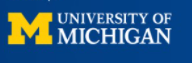

# University of Michigan
# Juan Pablo Escobar Naranjo


## Programa Especializado : Ciencias de los datos Aplicada con Python 
## Universidad Nacional de Colombia 

## Missing Values

Hemos visto una vista previa de cómo Pandas maneja los valores perdidos usando el tipo None y los valores NumPy NaN. Los valores perdidos son bastante comunes en las actividades de limpieza de datos. Y, los valores faltantes pueden estar ahí por varias razones, y solo quiero mencionar algunas aquí.

Por ejemplo, si está ejecutando una encuesta y un encuestado no respondió una pregunta, el valor que falta es en realidad una omisión. Este tipo de datos faltantes se denomina Falta al azar si hay otras variables que podrían usarse para predecir la variable que falta. En mi trabajo, cuando entrego encuestas, a menudo encuentro que los datos que faltan, como el interés en participar en un estudio de seguimiento, a menudo tienen alguna correlación con otro campo de datos, como el género o la etnia. Si no hay relación con otras variables, llamamos a estos datos que faltan completamente al azar (MCAR).

Estos son solo dos ejemplos de datos faltantes y hay muchos más. Por ejemplo, es posible que falten datos porque no fueron recopilados, ya sea por el proceso responsable de recopilarlos, como un investigador, o porque no tendrían sentido si se recopilaran. Este último ejemplo es extremadamente común cuando comienzas a unir DataFrames desde múltiples fuentes, como unirte a una lista de personas en una universidad con una lista de oficinas en la universidad (los estudiantes generalmente no tienen oficinas).

Veamos algunas formas de manejar los datos faltantes en pandas.

Pandas es bastante bueno para detectar valores perdidos directamente de formatos de datos subyacentes, como archivos CSV.

Aunque la mayoría de los valores perdidos suelen tener el formato NaN, NULL, None o N/A, a veces los valores perdidos no se etiquetan con tanta claridad. Por ejemplo, he trabajado con científicos sociales que usaban regularmente el valor de 99 en categorías binarias para indicar un valor faltante. La función pandas read_csv () tiene un parámetro llamado na_values ​​que nos permite especificar la forma de los valores perdidos. Permite utilizar escalares, cadenas, listas o diccionarios



In [ ]:
import pandas as pd 

dfclass = pd.read_csv('class_grades.csv')
dfclass.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,NaN,63.15,48.89
3,7,NaN,NaN,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,NaN,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


In [ ]:
## Podemos usar la función .isnull () para crear una máscara booleana de todo el marco de datos. 
## Esto transmite efectivamente la función isnull () a cada celda de datos.
 

mask_null = dfclass.isnull()
mask_null.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,True,False,False
3,False,True,True,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False
6,False,False,False,False,False,False
7,False,False,False,False,True,False
8,False,False,False,False,False,False
9,False,False,False,False,False,False


Esto puede resultar útil para procesar filas basadas en determinadas columnas de datos. Otra operación útil es poder eliminar todas aquellas filas en las que faltan datos, lo que se puede hacer con la función dropna ().


In [ ]:
dfclass.dropna().head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61
10,7,80.44,90.20,75.00,91.48,39.72
12,8,97.16,103.71,72.50,93.52,63.33
13,7,91.28,83.53,81.25,99.81,92.22


Observe cómo las filas indexadas con 2, 3, 7 y 11 ahora se han ido. Una de las funciones útiles que tiene Pandas para trabajar con valores perdidos es la función de relleno, fillna (). Esta función toma un número o parámetros.

Puede pasar un valor único que se llama valor escalar para cambiar todos los datos faltantes a un valor. Esto no es realmente aplicable en este caso, pero es un caso de uso bastante común.

 Entonces, si quisiéramos completar todos los valores faltantes con 0, usaríamos fillna

In [ ]:
dfclass.fillna(0, inplace = True )
dfclass.head(10)

,Prefix,Assignment,Tutorial,Midterm,TakeHome,Final
0,5,57.14,34.09,64.38,51.48,52.50
1,8,95.05,105.49,67.50,99.07,68.33
2,8,83.70,83.17,0.00,63.15,48.89
3,7,0.00,0.00,49.38,105.93,80.56
4,8,91.32,93.64,95.00,107.41,73.89
5,7,95.00,92.58,93.12,97.78,68.06
6,8,95.05,102.99,56.25,99.07,50.00
7,7,72.85,86.85,60.00,0.00,56.11
8,8,84.26,93.10,47.50,18.52,50.83
9,7,90.10,97.55,51.25,88.89,63.61


Tenga en cuenta que el atributo inplace hace que  pandas llenen los valores en línea y no devuelvan una copia del marco de datos, sino que modifican dataframe que tiene.



También podemos usar la opción na_filter para desactivar el filtrado de espacios en blanco, si el espacio en blanco es un valor real de interés. Pero en la práctica, esto es bastante raro. En datos sin NA, pasar na_filter = False puede mejorar el rendimiento de la lectura de un archivo grande.

Además de las reglas que controlan cómo se pueden cargar los valores perdidos, a veces es útil considerar los valores perdidos como si realmente tuvieran información.



In [ ]:
logdf = pd.read_csv('log.csv')
logdf.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


En estos datos, la primera columna es una marca de tiempo en el formato de época de Unix. La siguiente columna es el nombre de usuario seguido de una página web que están visitando y el video que están reproduciendo. Cada fila del DataFrame tiene una posición de reproducción. Y podemos ver que a medida que la posición de reproducción aumenta en uno, la marca de tiempo aumenta en unos 30 segundos.

Excepto por el usuario Bob. Resulta que Bob ha detenido su reproducción, por lo que a medida que aumenta el tiempo, la posición de reproducción no cambia. Tenga en cuenta también lo difícil que es para nosotros intentar derivar este conocimiento de los datos, porque no está ordenado por fecha y hora como cabría esperar. En realidad, esto no es infrecuente en sistemas que tienen un alto grado de paralelismo. Hay muchos valores perdidos en las columnas de volumen y en pausa. No es eficiente enviar esta información a través de la red si no ha cambiado. Entonces, este sistema articular simplemente inserta valores nulos en la base de datos si no hay cambios.

El siguiente es el parámetro de método(). Los dos valores de relleno comunes son ffill y bfill. ffill es para el llenado hacia adelante y actualiza un valor na para una celda en particular con el valor de la fila anterior. bfill es relleno hacia atrás, que es lo opuesto a ffill. Completa los valores faltantes con el siguiente valor válido.
 Es importante tener en cuenta que sus datos deben ordenarse para que esto tenga el efecto que desea. Los datos que provienen de los sistemas tradicionales de gestión de bases de datos generalmente no tienen garantía de pedido, al igual que estos datos. Así que ten cuidado.

En Pandas podemos ordenar por índice o por valores. Aquí solo promocionaremos la marca de tiempo a un índice y luego ordenaremos el índice.

In [ ]:
logdf = logdf.set_index('time')
logdf = logdf.sort_index()
logdf.head(20)

,user,video,playback position,paused,volume
time,,,,,
1469974424,cheryl,intro.html,5,False,10.0
1469974424,sue,advanced.html,23,False,10.0
1469974454,cheryl,intro.html,6,NaN,NaN
1469974454,sue,advanced.html,24,NaN,NaN
1469974484,cheryl,intro.html,7,NaN,NaN
1469974514,cheryl,intro.html,8,NaN,NaN
1469974524,sue,advanced.html,25,NaN,NaN
1469974544,cheryl,intro.html,9,NaN,NaN
1469974554,sue,advanced.html,26,NaN,NaN


Si miramos de cerca la salida, notaremos que el índice no es realmente único. Parece que dos usuarios pueden utilizar el sistema al mismo tiempo. Nuevamente, un caso muy común. Restablezcamos el índice y usemos algunos índices de varios niveles a tiempo Y el usuario juntos en su lugar, promocionemos el nombre de usuario a un segundo nivel del índice para tratar ese problema.


In [ ]:
logdf = logdf.reset_index()
logdf = logdf.set_index(['time', 'user'])
logdf

video  playback position paused  volume
time       user                                                   
1469974424 cheryl     intro.html                  5  False    10.0
           sue     advanced.html                 23  False    10.0
1469974454 cheryl     intro.html                  6    NaN     NaN
           sue     advanced.html                 24    NaN     NaN
1469974484 cheryl     intro.html                  7    NaN     NaN
1469974514 cheryl     intro.html                  8    NaN     NaN
1469974524 sue     advanced.html                 25    NaN     NaN
1469974544 cheryl     intro.html                  9    NaN     NaN
1469974554 sue     advanced.html                 26    NaN     NaN
1469974574 cheryl     intro.html                 10    NaN     NaN
1469974604 cheryl     intro.html                 11    NaN     NaN
1469974624 sue     advanced.html                 27    NaN     NaN
1469974634 cheryl     intro.html                 12    NaN     NaN
1469974654 sue     advanced.html                 28    NaN     5.0
1469974664 cheryl     intro.html                 13    NaN     NaN
1469974694 cheryl     intro.html                 14    NaN     NaN
1469974724 cheryl     intro.html                 15    NaN     NaN
           sue     advanced.html                 29    NaN     NaN
1469974754 sue     advanced.html                 30    NaN     NaN
1469974824 sue     advanced.html                 31    NaN     NaN
1469974854 sue     advanced.html                 32    NaN     NaN
1469974924 sue     advanced.html                 33    NaN     NaN
1469977424 bob        intro.html                  1   True    10.0
1469977454 bob        intro.html                  1    NaN     NaN
1469977484 bob        intro.html                  1    NaN     NaN
1469977514 bob        intro.html                  1    NaN     NaN
1469977544 bob        intro.html                  1    NaN     NaN
1469977574 bob        intro.html                  1    NaN     NaN
1469977604 bob        intro.html                  1    NaN     NaN
1469977634 bob        intro.html                  1    NaN     NaN
1469977664 bob        intro.html                  1    NaN     NaN
1469977694 bob        intro.html                  1    NaN     NaN
1469977724 bob        intro.html                  1    NaN     NaN

Ahora que tenemos los datos indexados y ordenados apropiadamente, podemos completar los datos faltantes usando ffill. Es bueno recordar cuando se trata de valores perdidos para que pueda tratar con columnas individuales o conjuntos de columnas proyectándolos. Por lo tanto, no tiene que corregir todos los valores faltantes en un solo comando.

In [ ]:
logdf = logdf.fillna(method='ffill')
logdf.head(20)

video  playback position  paused  volume
time       user                                                    
1469974424 cheryl     intro.html                  5   False    10.0
           sue     advanced.html                 23   False    10.0
1469974454 cheryl     intro.html                  6   False    10.0
           sue     advanced.html                 24   False    10.0
1469974484 cheryl     intro.html                  7   False    10.0
1469974514 cheryl     intro.html                  8   False    10.0
1469974524 sue     advanced.html                 25   False    10.0
1469974544 cheryl     intro.html                  9   False    10.0
1469974554 sue     advanced.html                 26   False    10.0
1469974574 cheryl     intro.html                 10   False    10.0
1469974604 cheryl     intro.html                 11   False    10.0
1469974624 sue     advanced.html                 27   False    10.0
1469974634 cheryl     intro.html                 12   False    10.0
1469974654 sue     advanced.html                 28   False     5.0
1469974664 cheryl     intro.html                 13   False     5.0
1469974694 cheryl     intro.html                 14   False     5.0
1469974724 cheryl     intro.html                 15   False     5.0
           sue     advanced.html                 29   False     5.0
1469974754 sue     advanced.html                 30   False     5.0
1469974824 sue     advanced.html                 31   False     5.0

También podemos hacer un relleno personalizado para reemplazar valores con la función replace (). Permite el reemplazo de varios enfoques: valor a valor, lista, diccionario, expresión regular. Generemos un ejemplo simple

In [ ]:
df = pd.DataFrame({'A':[1,1,3,4,5],
                   'B':[3,6,3,8,9],
                   'C':['a','b','c','d','e']
                   })
df

,A,B,C
0,1,3,a
1,1,6,b
2,3,3,c
3,4,8,d
4,5,9,e


In [ ]:
# Podemos reemplazar los 1 por 100, probemos el enfoque de valor a valor
df = df.replace(1,100)
df

,A,B,C
0,100,3,a
1,100,6,b
2,3,3,c
3,4,8,d
4,5,9,e


In [ ]:
## ¿Qué tal cambiar dos valores? Probemos el enfoque de lista.
## Por ejemplo, queremos cambiar 1 a 100 y 3 a 300.

df.replace([1,3],[100,300])

,A,B,C
0,100,300,a
1,100,6,b
2,300,300,c
3,4,8,d
4,5,9,e


¡Lo que es realmente bueno sobre el reemplazo de pandas es que también es compatible con expresiones regulares! Veamos nuevamente nuestros datos de los registros del conjunto de datos.

In [ ]:
logdf = pd.read_csv('log.csv')
logdf.head(20)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,intro.html,5,False,10.0
1,1469974454,cheryl,intro.html,6,NaN,NaN
2,1469974544,cheryl,intro.html,9,NaN,NaN
3,1469974574,cheryl,intro.html,10,NaN,NaN
4,1469977514,bob,intro.html,1,NaN,NaN
5,1469977544,bob,intro.html,1,NaN,NaN
6,1469977574,bob,intro.html,1,NaN,NaN
7,1469977604,bob,intro.html,1,NaN,NaN
8,1469974604,cheryl,intro.html,11,NaN,NaN
9,1469974694,cheryl,intro.html,14,NaN,NaN


Para reemplazar el uso de una expresión regular, hacemos el primer parámetro para reemplazar el patrón de expresiones regulares que queremos hacer coincidir, el segundo parámetro el valor que queremos emitir al coincidir, y luego pasamos un tercer parámetro "regex = True".

Imagina que queremos detectar todas las páginas html en la columna "video", digamos que solo significa que terminan con ".html", y queremos sobrescribir eso con el palabra clave "webpage".

In [ ]:
logdf.replace(to_replace= '.*.html' , value = 'webpage', regex = True)

,time,user,video,playback position,paused,volume
0,1469974424,cheryl,webpage,5,False,10.0
1,1469974454,cheryl,webpage,6,NaN,NaN
2,1469974544,cheryl,webpage,9,NaN,NaN
3,1469974574,cheryl,webpage,10,NaN,NaN
4,1469977514,bob,webpage,1,NaN,NaN
5,1469977544,bob,webpage,1,NaN,NaN
6,1469977574,bob,webpage,1,NaN,NaN
7,1469977604,bob,webpage,1,NaN,NaN
8,1469974604,cheryl,webpage,11,NaN,NaN
9,1469974694,cheryl,webpage,14,NaN,NaN


Una última nota sobre los valores perdidos. Cuando usa funciones estadísticas en DataFrames, estas funciones generalmente ignoran los valores perdidos. Por ejemplo, si intenta calcular el valor medio de un DataFrame, el
La función NumPy ignorará los valores perdidos. Por lo general, esto es lo que desea, pero debe tener en cuenta que los valores se excluyen. El motivo por el que faltan valores realmente importa según el problema que esté tratando de resolver. Puede que no sea razonable inferir valores perdidos, por ejemplo, si los datos no deberían existir en primer lugar.